# Processing Raw Amazon Reviews - Food.ipynb

In [1]:
## Load in Amazon Reviews Information
from IPython.display import display, Markdown
with open("Amazon Product Reviews.md") as f:
    info = f.read()

display(Markdown(info))

# Amazon Product Reviews

- URL: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews 

## Description

This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

## Basic statistics

| Ratings:  | 82.83 million        |
| --------- | -------------------- |
| Users:    | 20.98 million        |
| Items:    | 9.35 million         |
| Timespan: | May 1996 - July 2014 |

## Metadata

- reviews and ratings
- item-to-item relationships (e.g. "people who bought X also bought Y")
- timestamps
- helpfulness votes
- product image (and CNN features)
- price
- category
- salesRank

## Example

```
{  "reviewerID": "A2SUAM1J3GNN3B",  "asin": "0000013714",  "reviewerName": "J. McDonald",  "helpful": [2, 3],  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  "overall": 5.0,  "summary": "Heavenly Highway Hymns",  "unixReviewTime": 1252800000,  "reviewTime": "09 13, 2009" }
```

## Download link

See the [Amazon Dataset Page](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) for download information.

The 2014 version of this dataset is [also available](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html).

## Citation

Please cite the following if you use the data:

**Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering**

R. He, J. McAuley

*WWW*, 2016
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/www16a.pdf)

**Image-based recommendations on styles and substitutes**

J. McAuley, C. Targett, J. Shi, A. van den Hengel

*SIGIR*, 2015
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf)

In [2]:
import pandas as pd
import os, json, gzip
from urllib.request import urlopen
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', 200)

## Amazon Dataset Processing

In [3]:
import glob

json_files = sorted(glob.glob("raw/*.json.gz"))
json_files

['raw/Grocery_and_Gourmet_Food.json.gz',
 'raw/Grocery_and_Gourmet_Food_5.json.gz',
 'raw/meta_Grocery_and_Gourmet_Food.json.gz']

In [4]:
# Testing f-strings for filepath suffix
part=1
print(f"{part:03d}")

001


In [5]:
# Making new folder for processed reviews
folder = "raw-split/"
os.makedirs(folder, exist_ok=True)

In [6]:
%%time
## Adapted from Source: [parse_and_clean_metadata.ipynb](https://colab.research.google.com/drive/1Zv6MARGQcrBbLHyjPVVMZVnRWsRnVMpV?usp=sharing)
bad_data = {}

# for fname in files_to_process:
fname = 'raw/Grocery_and_Gourmet_Food.json.gz'##_5.json.gz'
category = os.path.basename(fname).replace(".json.gz",'')#"_5.json.gz",'')

### load the meta data
data = []
review_files_created = []
i = 0 # Counter for row # 
part = 1 # Label for saving data mid-loop
print(f'\n[i] Processing {fname}')

with gzip.open(fname) as f:

    for l in tqdm(f):
        data.append(json.loads(l.strip()))
        i+=1
        # Spliting into smaller csvs
        # every 500,000 reviews, save new csv.gz
        if i > 100_000:
            try:
                df = pd.DataFrame(data)
                # df = df.fillna('')
                # filter_title = df['title'].str.contains('getTime')
                # df = df[~filter_title] 
                fname_csv =f"{folder}amazon-reviews-{category.lower().strip()}-part-{part:03d}.csv"#.gz" 
                
                print(f"- Creating file: {fname_csv}")
                df.to_csv(fname_csv, index=False)#, compression='gzip')
                review_files_created.append(fname_csv)
                
            except Exception as e:
                print("Error with ")
                bad_data[fname] = data.copy()
                display(e)
                print(e)
            
            finally:
                # Increment file part number and reset i 
                part+=1
                i = 0
                data = []
    
# total length of list, this number equals total number of products
# print(len(data))
print(f'- finished.')
print(f"Errors with files: {bad_data.keys()}")


[i] Processing raw/Grocery_and_Gourmet_Food.json.gz


0it [00:00, ?it/s]

- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-001.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-002.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-003.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-004.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-005.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-006.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-007.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-008.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-009.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-010.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-011.csv
- Creating file: raw-split/amazon-reviews-grocery_and_gourmet_food-part-012.csv
- Creating file: raw-split/amazon-review

In [7]:
len(bad_data)

0

In [8]:
# Review created files
review_files_created

['raw-split/amazon-reviews-grocery_and_gourmet_food-part-001.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-002.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-003.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-004.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-005.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-006.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-007.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-008.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-009.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-010.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-011.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-012.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-013.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-014.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-015.c

## Preparing Metadata 

- [ ] Use the metadata files to select reviews on the same item or sub-category.
- [ ] Rename the columns so they do not match project dataset/

In [9]:
# import glob, os
# import pandas as pd

In [10]:
# meta_files = sorted(glob.glob('/Users/codingdojo/Downloads/meta*.json.gz'))
# meta_files

## Metadata

In [11]:
fname_meta =  'raw/meta_Grocery_and_Gourmet_Food.json.gz'
fname_meta

'raw/meta_Grocery_and_Gourmet_Food.json.gz'

In [12]:
%%time
bad_data = {}
meta_files_created = []


### load the meta data
# total = 27_164_983
metadata = []
i = 0 # Counter for row # 
part = 1 # Label for saving data mid-loop
print(f'\n[i] Processing {fname}')
# os.makedirs(f"{folder}meta/", exist_ok=True)

with gzip.open(fname_meta) as f:
    category = os.path.basename(fname).replace(".json.gz",'').replace("meta_",'')
    
    for l in tqdm(f):
        metadata.append(json.loads(l.strip()))
        i+=1
        # every 200,000 products, save new csv.gz
        if i > 50_000:
            try:
                meta_df = pd.DataFrame(metadata)
                # df = df.fillna('')
                # filter_title = df['title'].str.contains('getTime')
                # df = df[~filter_title]
                
                fname_out = f"{folder}metadata-amazon-{category.lower().strip()}-part-{part:03d}.csv"#.gz"
                print(f"- Creating file {fname_out}")
                meta_df.to_csv(fname_out, 
                          index=False,# compression='gzip', 
                               escapechar="\\")
                meta_files_created.append(fname_out)
            except Exception as e:
                # print("Error with ")
                # bad_data[fname] = data.copy()
                display(e)
                print(e)
            
            finally:
                # Increment file part number and reset i 
                part+=1
                i = 0
                metadata = []
# meta_files_created


[i] Processing raw/Grocery_and_Gourmet_Food.json.gz


0it [00:00, ?it/s]

- Creating file raw-split/metadata-amazon-grocery_and_gourmet_food-part-001.csv
- Creating file raw-split/metadata-amazon-grocery_and_gourmet_food-part-002.csv
- Creating file raw-split/metadata-amazon-grocery_and_gourmet_food-part-003.csv
- Creating file raw-split/metadata-amazon-grocery_and_gourmet_food-part-004.csv
- Creating file raw-split/metadata-amazon-grocery_and_gourmet_food-part-005.csv
CPU times: user 14.1 s, sys: 417 ms, total: 14.5 s
Wall time: 15.1 s


In [13]:
meta_files_created

['raw-split/metadata-amazon-grocery_and_gourmet_food-part-001.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-002.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-003.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-004.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-005.csv']

# 👉Entry Point: Load in Split Files

In [14]:
import glob, os, json
import pandas as pd

In [15]:
try:
    print(folder)
except NameError:
    folder = 'raw-split/'
    print(folder)

raw-split/


In [16]:
folder

'raw-split/'

In [17]:
# # files_created_ = ['Data/meta/amazon-toys_and_games-metadata-part-001.csv.gz',
# #  'Data/meta/amazon-toys_and_games-metadata-part-002.csv.gz',
# #  'Data/meta/amazon-toys_and_games-metadata-part-003.csv.gz']

meta_files_created_ = sorted(glob.glob(f"{folder}*meta*"))
# files_created_ = sorted(glob.glob("Data/meta/*toys_and_games*"))
meta_files_created_

['raw-split/metadata-amazon-grocery_and_gourmet_food-part-001.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-002.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-003.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-004.csv',
 'raw-split/metadata-amazon-grocery_and_gourmet_food-part-005.csv']

In [18]:
# meta_df = pd.concat([pd.read_csv(f) for f in files_created])
meta_df = pd.concat([pd.read_csv(f, low_memory=False) for f in meta_files_created_])
meta_df = meta_df.reset_index(drop=True)
meta_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']",NaN,"['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",NaN,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],NaN,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,NaN,NaN,$41.91,0681727810,[],[],NaN
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']",NaN,"['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",NaN,Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,NaN,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN
2,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",NaN,['Jazz up your cakes with a sparkling monogram from our Sparkling collection! These single letter monograms are silver plated covered in crystal rhinestones and come in several sizes for your conv...,NaN,Letter C - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],NaN,Unik Occasions,[],"['>#669,941 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#9,899 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",['B07DXN65TF'],Amazon Home,NaN,"September 21, 2010",$29.95,1888861118,[],[],NaN
3,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",NaN,"['Large Letter - Height 4.75""']",NaN,Letter H - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],NaN,Other,"['Large Letter - Height 4.75""']","['>#832,581 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#12,883 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,NaN,"September 11, 2011",$11.45,1888861517,[],[],NaN
4,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",NaN,"['4.75""']",NaN,Letter S - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#8,585 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,NaN,"September 11, 2011",$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250000,"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Pickles']",NaN,"['YANKEETRADERS, Pickled Asparagus is a natural asparagus made with just the right combination of dill and other seasonings. Try just one bite of our Pickled Dill Asparagus spears and you will sur...",NaN,"YANKEETRADERS Brand, Fresh Pickled Asparagus (2 Pack)",[],NaN,YANKEETRADERS,[],"399,528 in Grocery & Gourmet Food (",[],Grocery,NaN,NaN,NaN,B010R3NA0G,[],[],"{'Shipping Weight:': '3.4 pounds', 'ASIN: ': 'B010R3NA0G', 'UPC:': '673166005969'}"
250001,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Flours & Meals']",NaN,"['Brown Rice Is Richly Nutritious And Na

<Axes: >

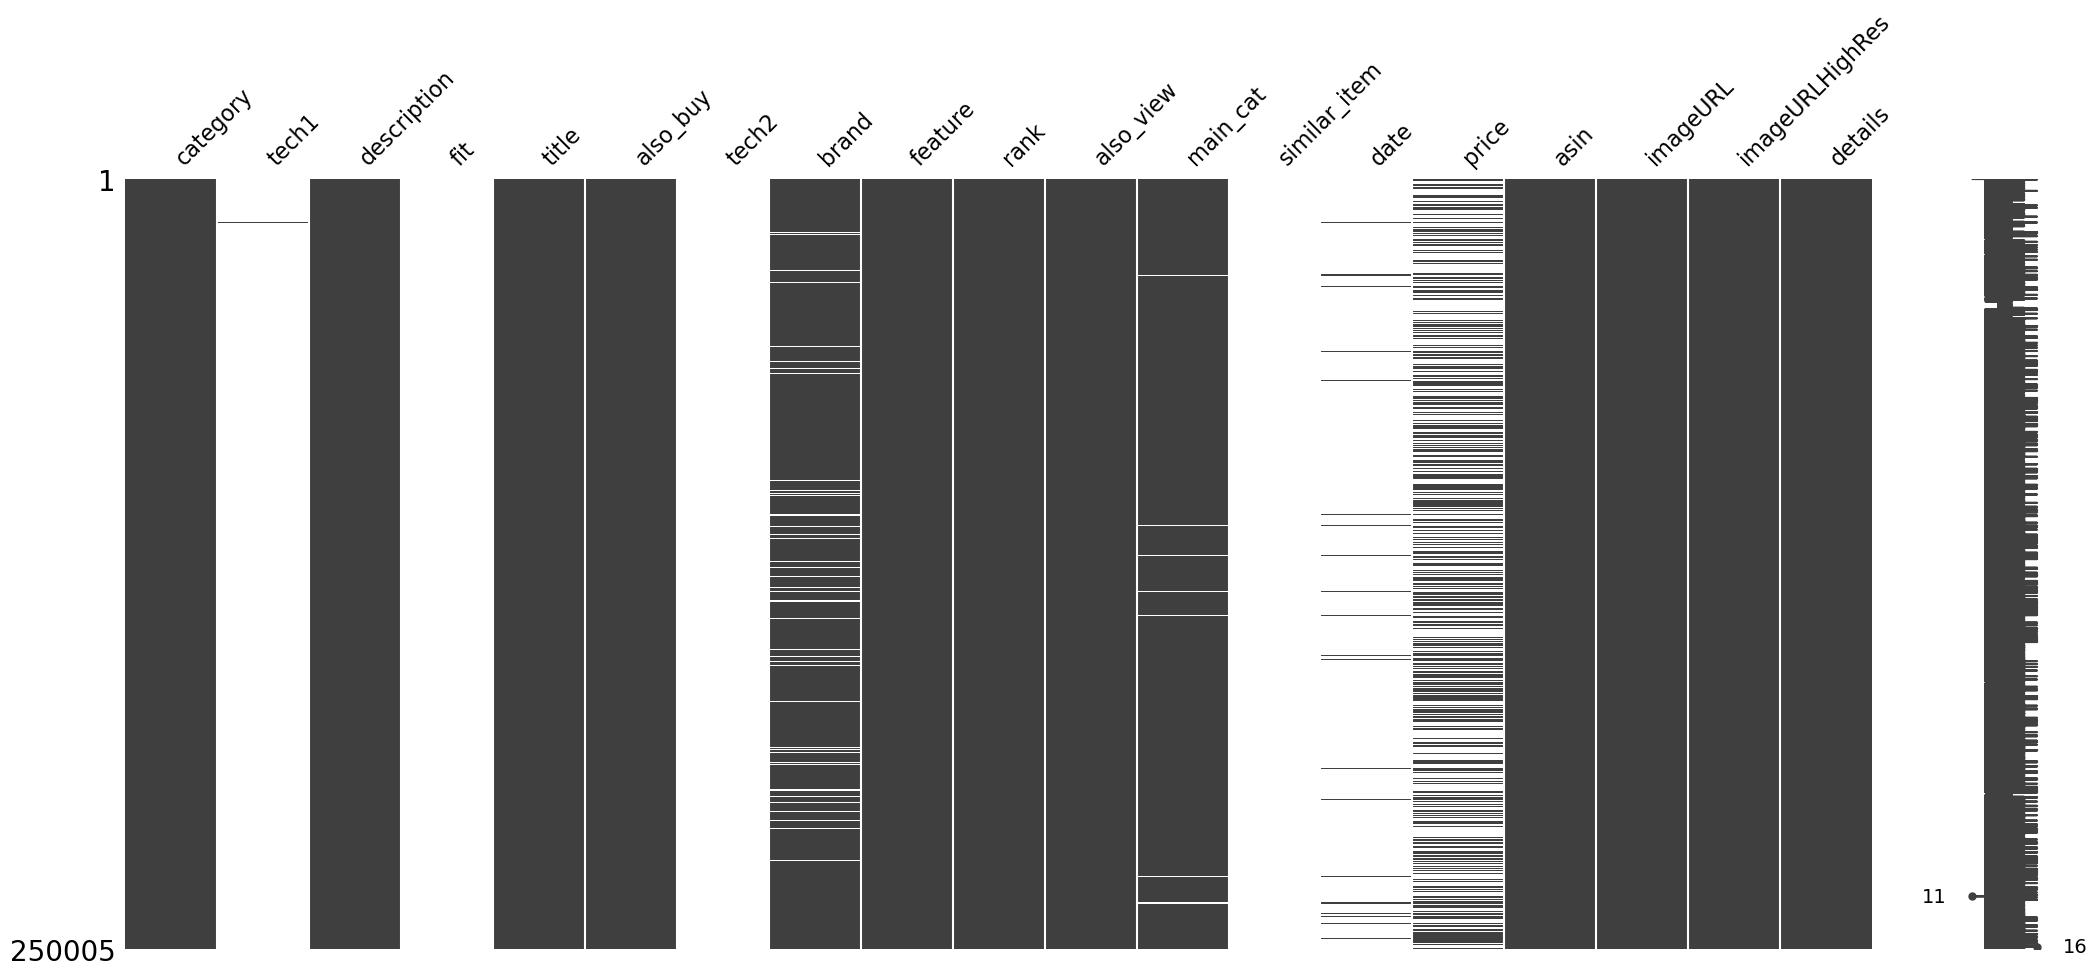

In [19]:
import missingno 
missingno.matrix(meta_df)

In [20]:
# removing columns that are most null
perc_null = meta_df.isna().sum()/len(meta_df) * 100
perc_null

category             0.000000
tech1               99.743205
description          0.000000
fit                 99.998800
title                0.001200
also_buy             0.000000
tech2              100.000000
brand                4.237915
feature              0.000000
rank                 0.000000
also_view            0.000000
main_cat             0.450791
similar_item        99.911202
date                96.919262
price               54.156517
asin                 0.000000
imageURL             0.000000
imageURLHighRes      0.000000
details              0.009600
dtype: float64

In [21]:
# Identifying cols with >95% null
perc_null[perc_null>95]

tech1            99.743205
fit              99.998800
tech2           100.000000
similar_item     99.911202
date             96.919262
dtype: float64

In [22]:
# List of column names to drop
drop_cols = perc_null[perc_null>95].index.tolist()
drop_cols

['tech1', 'fit', 'tech2', 'similar_item', 'date']

In [23]:
# Drop null columns.
meta_df = meta_df.drop(columns=drop_cols, errors='ignore')
meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN
2,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",['Jazz up your cakes with a sparkling monogram from our Sparkling collection! These single letter monograms are silver plated covered in crystal rhinestones and come in several sizes for your conv...,Letter C - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,[],"['>#669,941 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#9,899 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",['B07DXN65TF'],Amazon Home,$29.95,1888861118,[],[],NaN
3,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['Large Letter - Height 4.75""']",Letter H - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Other,"['Large Letter - Height 4.75""']","['>#832,581 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#12,883 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$11.45,1888861517,[],[],NaN
4,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['4.75""']",Letter S - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#8,585 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250000,"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Pickles']","['YANKEETRADERS, Pickled Asparagus is a natural asparagus made with just the right combination of dill and other seasonings. Try just one bite of our Pickled Dill Asparagus spears and you will sur...","YANKEETRADERS Brand, Fresh Pickled Asparagus (2 Pack)",[],YANKEETRADERS,[],"399,528 in Grocery & Gourmet Food (",[],Grocery,NaN,B010R3NA0G,[],[],"{'Shipping Weight:': '3.4 pounds', 'ASIN: ': 'B010R3NA0G', 'UPC:': '673166005969'}"
250001,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Flours & Meals']","['Brown Rice Is Richly Nutritious And Naturally Gluten-free. Grown Without Chemicals, Or Animal-based Fertilizers Of Any Kind, Then Sprouted To Maximize Nutrition, Digestibility And Flavor.', ""'OR...","One Degree Organic Gluten-Free Sprouted Brown Rice Flour, 24 Ounce

## Select Main Category

- Cleaning the categories of html tags

In [24]:
filter_html = meta_df['main_cat'].fillna('').str.contains('<')
filter_html.sum()

103

In [25]:
# filter_html = meta_df['category'].fillna('').str.contains('<')
# filter_html.sum()

In [26]:
# Demonstrating some of the categories with html tags
meta_df[filter_html]

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details
8523,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Pudding & Gelatin', 'Pudding']",['Jell-O Cook & Serve Banana Cream Pudding (3 oz.)'],Jell-O Pudding &amp; Pie Filling Banana Cream Cook &amp; Serve - 24 Pack,[],NaN,[],"1,905,637 in CDs & Vinyl (",['B00JD9WTLM'],"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png"" class=""nav-categ-image"" alt=""Digital Music""/>",NaN,B0007OXDOO,[],[],{'ASIN:': 'B0007OXDOO'}
9348,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations']",[],Kids Picks Hit Mix 4,[],Various Artists,[],"679,355 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png"" class=""nav-categ-image"" alt=""Digital Music""/>",$1.94,B000A7Q2J6,[],[],"{'Audio CD': '(August 16, 2005)', 'Number of Discs:': '1', 'Label:': 'Capitol', 'ASIN:': 'B000A7Q2J6'}"
19786,"['Grocery & Gourmet Food', 'Cooking & Baking']",['Greek Fisherman/Sailor Hat Black Wool Choose a SizeFor a classic accessory that looks great both on and off the water choose aGreek fishermans hat. Made of black wool this traditional Greek fish...,Greek Fisherman Hat Black Wool (Choose a Size) Size 7,[],Parthenon Foods,[],"1,089,878 in Grocery & Gourmet Food (",[],"<img src=""https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png"" class=""nav-categ-image"" alt=""AMAZON FASHION""/>",$25.29,B000LRH8XY,[],[],"{'\\n Item Weight: \\n ': '6.4 ounces', 'Shipping Weight:': '6.4 ounces (', 'ASIN: ': 'B000LRH8XY', 'UPC:': '847126168616'}"
23793,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Milk & Cream', 'Dairy Milk']","['Native Forest Unsweetened Classic Coconut Milk, Organic, 13.5 Fl Oz', 'Once opened, refrigerate and enjoy within 4 days.', 'Organic coconut milk (organic coconut, water, organic guar gum).', 'Co...","Native Forest Unsweetened Classic Coconut Milk, Organic, 13.5 Fl Oz","['B000VK3RLS', 'B000QX94JE']",Native Forest,[],[],"['B00M8VSKW4', 'B011LVDECM', 'B001HTJ2BQ', 'B01MA4GQH9', 'B00AF7XMYY', 'B000VDZ3VW', 'B074RPKLCK', 'B077XW2LKS', 'B00CQ7RYZ4', 'B000VK3RLS', 'B0047YYY98', 'B00JUB8N3G', 'B00113ZZ5U', 'B001HTJ2ES',...","<img src=""https://images-na.ssl-images-amazon.com/images/G/01/pantry/subnav/pantry-subnav-logo._CB474181323_.png"" class=""nav-categ-image"" alt=""Prime Pantry""/>",NaN,B000QSOC4Q,"['https://images-na.ssl-images-amazon.com/images/I/312uJMe8ZoL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/616Dvls7naL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/312uJMe8ZoL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/616Dvls7naL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51l9zsMCp...","{'\\n Product Dimensions: \\n ': '2.9 x 2.8 x 4.3 inches ; 1.05 pounds', 'Shipping Weight:': '1.1 pounds', 'Domestic Shipping: ': 'Item can be shipped within U.S.', 'International Shipping: ..."
27250,"['Grocery & Gourmet Food', 'Cooking & Baking']",['Made in Greece. Stock may be light or dark blue.'],Worry Beads - Komboloi Blue with Silver,[],Parthenon Foods,"['<span class=""a-text-bold"">Shipping Weight:\\n </span>\\n <span>1.6 ounces (<a href=\\'https://www.amazon.com/gp/help/seller/shipping.html/ref=dp_pd_shipping...","517,369 in Grocery & Gourmet Food (","['B00IOWPROU', 'B00O976SDI', 'B076LPPWVS', 'B00K4AK0JM', 'B0723616PL', 'B07CXJ5DYL', 'B07CVLDH2Y', 'B077M56Y3J']","<img src=""https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png"" class=""nav-categ-image"" alt=""AMAZON FASHION""/>",$8.04,B000VA5IZQ,[],[],{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245521,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffe

In [27]:
# import re

# # Regular expression to match HTML tags
# regex = r"<[^>]*>"


# # Apply the regex to the DataFrame column using str.replace
# meta_df['main_cat-cleaned'] = meta_df['main_cat'].str.replace(regex, '', regex=True)
# # meta_df['category-cleaned'] = meta_df['category'].str.replace(regex, '', regex=True)
# meta_df.loc[filter_html, ['main_cat']].head().values

- The categories with html tags are not relevant so we can drop

In [28]:
# Removing products with bad main category
meta_df = meta_df.loc[~filter_html]
meta_df = meta_df.reset_index(drop=True)
# meta_df = meta_df.set_index('asin')
meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN
2,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",['Jazz up your cakes with a sparkling monogram from our Sparkling collection! These single letter monograms are silver plated covered in crystal rhinestones and come in several sizes for your conv...,Letter C - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,[],"['>#669,941 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#9,899 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",['B07DXN65TF'],Amazon Home,$29.95,1888861118,[],[],NaN
3,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['Large Letter - Height 4.75""']",Letter H - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Other,"['Large Letter - Height 4.75""']","['>#832,581 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#12,883 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$11.45,1888861517,[],[],NaN
4,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['4.75""']",Letter S - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#8,585 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249897,"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Pickles']","['YANKEETRADERS, Pickled Asparagus is a natural asparagus made with just the right combination of dill and other seasonings. Try just one bite of our Pickled Dill Asparagus spears and you will sur...","YANKEETRADERS Brand, Fresh Pickled Asparagus (2 Pack)",[],YANKEETRADERS,[],"399,528 in Grocery & Gourmet Food (",[],Grocery,NaN,B010R3NA0G,[],[],"{'Shipping Weight:': '3.4 pounds', 'ASIN: ': 'B010R3NA0G', 'UPC:': '673166005969'}"
249898,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Flours & Meals']","['Brown Rice Is Richly Nutritious And Naturally Gluten-free. Grown Without Chemicals, Or Animal-based Fertilizers Of Any Kind, Then Sprouted To Maximize Nutrition, Digestibility And Flavor.', ""'OR...","One Degree Organic Gluten-Free Sprouted Brown Rice Flour, 24 Ounce

In [29]:
meta_df.duplicated().sum()

3697

In [30]:
meta_df = meta_df.drop_duplicates()
meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN
2,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']",['Jazz up your cakes with a sparkling monogram from our Sparkling collection! These single letter monograms are silver plated covered in crystal rhinestones and come in several sizes for your conv...,Letter C - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,[],"['>#669,941 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#9,899 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",['B07DXN65TF'],Amazon Home,$29.95,1888861118,[],[],NaN
3,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['Large Letter - Height 4.75""']",Letter H - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Other,"['Large Letter - Height 4.75""']","['>#832,581 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#12,883 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$11.45,1888861517,[],[],NaN
4,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Frosting, Icing & Decorations', 'Cake & Cupcake Toppers', 'Cake Toppers']","['4.75""']",Letter S - Swarovski Crystal Monogram Wedding Cake Topper Letter,[],Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 in Kitchen & Dining)', '>#8,585 in Kitchen & Dining > Bakeware > Decorating Tools > Cake & Cupcake Toppers > Cake Toppers']",[],Amazon Home,$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249897,"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Pickles']","['YANKEETRADERS, Pickled Asparagus is a natural asparagus made with just the right combination of dill and other seasonings. Try just one bite of our Pickled Dill Asparagus spears and you will sur...","YANKEETRADERS Brand, Fresh Pickled Asparagus (2 Pack)",[],YANKEETRADERS,[],"399,528 in Grocery & Gourmet Food (",[],Grocery,NaN,B010R3NA0G,[],[],"{'Shipping Weight:': '3.4 pounds', 'ASIN: ': 'B010R3NA0G', 'UPC:': '673166005969'}"
249898,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Flours & Meals']","['Brown Rice Is Richly Nutritious And Naturally Gluten-free. Grown Without Chemicals, Or Animal-based Fertilizers Of Any Kind, Then Sprouted To Maximize Nutrition, Digestibility And Flavor.', ""'OR...","One Degree Organic Gluten-Free Sprouted Brown Rice Flour, 24 Ounce

In [31]:
len(meta_df)

246205

In [32]:
# fpath_meta = "combined-metadata-amazon-groceries-gourmet.csv.gz"
# meta_df.to_csv(fpath_meta,compression='gzip', index=False)
# # meta_df.to_json(fpath_meta)

In [33]:
# meta_df.loc[filter_html, ['main_cat']].value_counts()

### Saving Product Asin Map

In [34]:
# raise Exception("Review your workflow from the codealong repo before continuing below")

In [35]:
# Get dict map of asin id to title 
asin_title_map = meta_df.set_index('asin')['title'].to_dict()
list(asin_title_map.keys())[:5]

['0681727810', '0853347867', '1888861118', '1888861517', '1888861614']

In [36]:
# Make a new folder for metadata
folder_meta = "metadata/"
os.makedirs(folder_meta, exist_ok=True)

In [37]:
import json
fpath_asin_map = folder_meta + 'asin-code-map.json'
print(fpath_asin_map)
with open(fpath_asin_map,'w') as f:
    json.dump(fpath_asin_map,f)

metadata/asin-code-map.json


## Filter for Correct Main Category

In [38]:
# meta_df['title'].str.contains("Barbie").sum()

In [39]:
meta_df['main_cat'].value_counts()

Grocery                         225382
Health & Personal Care            7507
Amazon Home                       6930
Toys & Games                      1533
All Beauty                        1326
Industrial & Scientific            933
Office Products                    527
Sports & Outdoors                  347
Cell Phones & Accessories          145
Pet Supplies                       116
Arts, Crafts & Sewing              115
Baby                                72
Tools & Home Improvement            57
Computers                           37
All Electronics                     18
Home Audio & Theater                12
Automotive                           6
Movies & TV                          4
Musical Instruments                  3
Software                             2
Camera & Photo                       2
Video Games                          2
Portable Audio & Accessories         1
Car Electronics                      1
Name: main_cat, dtype: int64

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_45143/2139762053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['category_list'] = meta_df['category'].map(ast.literal_eval)


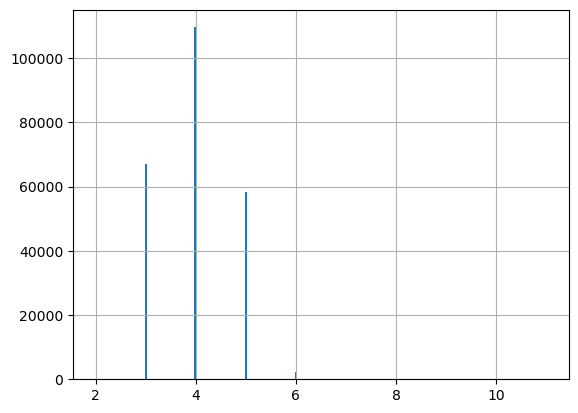

In [40]:
import ast 

meta_df['category_list'] = meta_df['category'].map(ast.literal_eval)
meta_df['category_list'].map(len).hist(bins='auto');

In [41]:
## TEMP TEST IF USING MAIN_CAT ALONE IS SUFFICIENT
filter_main_cat = meta_df['main_cat'] == "Grocery"
meta_df = meta_df[filter_main_cat]
meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details,category_list
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs, Cheese, Gouda]"
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,"[Grocery & Gourmet Food, Cooking & Baking, Sugar Substitutes, Xylitol]"
10,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,4639725043,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21kL85tr1...",NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Black]"
11,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Teabags uses a new way to make tea. To lock in as much of the tea taste and aroma as possible, we developed an innovative new process. We press fresh, high quality tea leaves...",Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),"['B000JSQDK4', 'B007ZI1SKG', '4639725043', 'B00KPFHOPO', 'B01LY2304D', 'B00GRS0CAM', 'B00RZ7EOC6', 'B007SH2C6S', 'B000MQ5YRQ', 'B00286KM8E', 'B0005XMOI8', 'B000GG5IYQ', 'B009UQXD90', 'B00BOMGIBI']",Lipton,[],"15,487 in Grocery & Gourmet Food (","['B000JSQDK4', 'B007ZI1SKG', 'B00286KM8E', 'B01LY2304D', '4639725043', 'B00BOMGIBI', 'B00CISKNPO', 'B00U9W37QS', 'B003CJJLYW', 'B00KO3O1BC', 'B002YJC990', 'B003CJLNT8', 'B000MQ5YRQ', 'B007ZI1UFY',...",Grocery,$12.98,4639725183,['https://images-na.ssl-images-amazon.com/images/I/31TlgFpkgZL._SS40_.jpg'],['https://images-na.ssl-images-amazon.com/images/I/31TlgFpkgZL.jpg'],NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea,

### One-Hot Encoding Most Common Categories

In [42]:
meta_df['category_list'].head()

0                   [Grocery & Gourmet Food, Dairy, Cheese & Eggs, Cheese, Gouda]
1          [Grocery & Gourmet Food, Cooking & Baking, Sugar Substitutes, Xylitol]
10           [Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Black]
11           [Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Black]
12    [Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Tea Samplers]
Name: category_list, dtype: object

In [43]:
exploded_meta = meta_df.explode('category_list')
exploded_meta['category_list'].value_counts()

Grocery & Gourmet Food                                                                            225382
Beverages                                                                                          48238
Coffee, Tea & Cocoa                                                                                35355
Candy & Chocolate                                                                                  33178
Cooking & Baking                                                                                   30843
                                                                                                   ...  
Squash                                                                                                 1
Features of this item include: 1/2 Zip, Cotton, Presidents Day Apparel, Winter Blowout Apparel         1
Jazz                                                                                                   1
Sofrito Sauce                                          

In [44]:
# Previewing main_cat vs categories 
exploded_meta.loc[:,['main_cat','category_list']]#.value_counts()

,main_cat,category_list
0,Grocery,Grocery & Gourmet Food
0,Grocery,"Dairy, Cheese & Eggs"
0,Grocery,Cheese
0,Grocery,Gouda
1,Grocery,Grocery & Gourmet Food
...,...,...
249900,Grocery,Candy & Chocolate Assortments
249901,Grocery,Grocery & Gourmet Food
249901,Grocery,Candy & Chocolate
249901,Grocery,Jelly Beans & Gummy Candy


In [45]:
exploded_meta['category_list'].nunique()

1128

In [46]:
exploded_meta['category_list'].value_counts().head(50)

Grocery & Gourmet Food                    225382
Beverages                                  48238
Coffee, Tea & Cocoa                        35355
Candy & Chocolate                          33178
Cooking & Baking                           30843
Snack Foods                                26374
Tea                                        17822
Herbs, Spices & Seasonings                 16045
Coffee                                     15069
Bottled Beverages, Water & Drink Mixes     11937
Sauces, Gravies & Marinades                 9055
Canned, Jarred & Packaged Foods             8779
Food & Beverage Gifts                       7614
Cookies                                     7134
Jelly Beans & Gummy Candy                   7031
Mixed Spices & Seasonings                   6388
Candy & Chocolate Bars                      6126
Breakfast Foods                             6114
Tea Samplers                                6002
Single Herbs & Spices                       5746
Hard Candy & Lollipo

In [47]:
# exploded_meta['category_list'].value_counts()#.tail(20)

In [48]:
percent_categories = exploded_meta['category_list'].value_counts(normalize=True)* 100#.head(50)
percent_categories.head()

Grocery & Gourmet Food    25.785319
Beverages                  5.518774
Coffee, Tea & Cocoa        4.044866
Candy & Chocolate          3.795801
Cooking & Baking           3.528661
Name: category_list, dtype: float64

In [49]:
### Try...filtering for...

In [50]:
# Filter any category that occurs less than 5 percent of the time
val_counts =exploded_meta['category_list'].value_counts()
filter_categories = percent_categories >1
filter_categories.sum()

12

In [51]:
keep_categories = filter_categories[filter_categories].index
keep_categories

Index(['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa',
       'Candy & Chocolate', 'Cooking & Baking', 'Snack Foods', 'Tea',
       'Herbs, Spices & Seasonings', 'Coffee',
       'Bottled Beverages, Water & Drink Mixes', 'Sauces, Gravies & Marinades',
       'Canned, Jarred & Packaged Foods'],
      dtype='object')

In [52]:
small_exploded_meta_df = exploded_meta[exploded_meta['category_list'].isin(keep_categories)]
small_exploded_meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details,category_list
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN,Grocery & Gourmet Food
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,Grocery & Gourmet Food
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,Cooking & Baking
10,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,4639725043,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21kL85tr1...",NaN,Grocery & Gourmet Food
10,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Lab

In [53]:
# val_counts.loc[filter_categories].sum()

In [54]:
# exploded_meta = exploded_metafilter_categories.index]
# exploded_meta

In [55]:
help(small_exploded_meta_df['category_list'].str.get_dummies)

Help on method get_dummies in module pandas.core.strings.accessor:

get_dummies(sep='|') method of pandas.core.strings.accessor.StringMethods instance
    Return DataFrame of dummy/indicator variables for Series.
    
    Each string in Series is split by sep and returned as a DataFrame
    of dummy/indicator variables.
    
    Parameters
    ----------
    sep : str, default "|"
        String to split on.
    
    Returns
    -------
    DataFrame
        Dummy variables corresponding to values of the Series.
    
    See Also
    --------
    get_dummies : Convert categorical variable into dummy/indicator
        variables.
    
    Examples
    --------
    >>> pd.Series(['a|b', 'a', 'a|c']).str.get_dummies()
       a  b  c
    0  1  1  0
    1  1  0  0
    2  1  0  1
    
    >>> pd.Series(['a|b', np.nan, 'a|c']).str.get_dummies()
       a  b  c
    0  1  1  0
    1  0  0  0
    2  1  0  1



In [56]:
exploded_meta_df_with_ohe_cats =  pd.get_dummies(small_exploded_meta_df, columns=['category_list'], prefix="Category")
exploded_meta_df_with_ohe_cats

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN,0,0,0,0,0,0,0,1,0,0,0,0
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,0,0,0,0,0,0,0,1,0,0,0,0
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,0,0,0,0,0,0,1,0,0,0,0,0
10,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,4639725043,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/i

In [57]:
# del final_meta_df

In [58]:
# dummy_categories = small_meta_df['category_list'].str.get_dummies()
# dummy_categories

In [59]:
# meta_df_final = pd.concat([small_meta_df, dummy_categories],axis=1)
# meta_df_final

In [60]:
new_cat_cols = [c for c in exploded_meta_df_with_ohe_cats.columns if "category" in c.lower()]
ohe_categories_to_merge = exploded_meta_df_with_ohe_cats.groupby("asin")[new_cat_cols].sum()
ohe_categories_to_merge

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_45143/298848675.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ohe_categories_to_merge = exploded_meta_df_with_ohe_cats.groupby("asin")[new_cat_cols].sum()


,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea
asin,,,,,,,,,,,,
0681727810,0,0,0,0,0,0,0,1,0,0,0,0
0853347867,0,0,0,0,0,0,1,1,0,0,0,0
4639725043,1,0,0,0,0,1,0,1,0,0,0,1
4639725183,1,0,0,0,0,1,0,1,0,0,0,1
4858582000,1,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
B010R417MI,0,0,0,0,0,0,0,1,0,0,0,0
B010R4B8OU,0,0,0,0,0,0,1,1,0,0,0,0
B010R544D6,0,0,1,0,0,0,0,1,0,0,0,0


In [61]:
small_meta_df = meta_df[meta_df['asin'].isin(ohe_categories_to_merge.index.unique())]
small_meta_df

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin,imageURL,imageURLHighRes,details,category_list
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,0681727810,[],[],NaN,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs, Cheese, Gouda]"
1,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,0853347867,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,"[Grocery & Gourmet Food, Cooking & Baking, Sugar Substitutes, Xylitol]"
10,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,4639725043,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21kL85tr1...",NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Black]"
11,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Teabags uses a new way to make tea. To lock in as much of the tea taste and aroma as possible, we developed an innovative new process. We press fresh, high quality tea leaves...",Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),"['B000JSQDK4', 'B007ZI1SKG', '4639725043', 'B00KPFHOPO', 'B01LY2304D', 'B00GRS0CAM', 'B00RZ7EOC6', 'B007SH2C6S', 'B000MQ5YRQ', 'B00286KM8E', 'B0005XMOI8', 'B000GG5IYQ', 'B009UQXD90', 'B00BOMGIBI']",Lipton,[],"15,487 in Grocery & Gourmet Food (","['B000JSQDK4', 'B007ZI1SKG', 'B00286KM8E', 'B01LY2304D', '4639725043', 'B00BOMGIBI', 'B00CISKNPO', 'B00U9W37QS', 'B003CJJLYW', 'B00KO3O1BC', 'B002YJC990', 'B003CJLNT8', 'B000MQ5YRQ', 'B007ZI1UFY',...",Grocery,$12.98,4639725183,['https://images-na.ssl-images-amazon.com/images/I/31TlgFpkgZL._SS40_.jpg'],['https://images-na.ssl-images-amazon.com/images/I/31TlgFpkgZL.jpg'],NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea,

In [62]:
len(small_meta_df), len(ohe_categories_to_merge)

(225382, 225382)

In [63]:
meta_df_final = pd.concat([small_meta_df.set_index("asin"), ohe_categories_to_merge],axis=1)
meta_df_final

,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,imageURL,imageURLHighRes,details,category_list,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea
asin,,,,,,,,,,,,,,,,,,,,,,,,,,
0681727810,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,[],[],NaN,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs, Cheese, Gouda]",0,0,0,0,0,0,0,1,0,0,0,0
0853347867,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,"[Grocery & Gourmet Food, Cooking & Baking, Sugar Substitutes, Xylitol]",0,0,0,0,0,0,1,1,0,0,0,0
4639725043,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21kL85tr1...",NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Black]",1,0,0,0,0,1,0,1,0,0,0,1
4639725183,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Teabags uses a new way to make tea. To lock in as much of the tea taste and aroma as possible, we developed an innovative new process. We press fresh, high quality tea leaves...",Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),"['B000JSQDK4', 'B007ZI1SKG', '4639725043', 'B00KPFHOPO', 'B01LY2304D', 'B00GRS0CAM', 'B00RZ7EOC6', 'B007SH2C6S', 'B000MQ5YRQ', 'B00286KM8E', 'B0005XMOI8', 'B000GG5IYQ', 'B009UQXD90', 'B00BOMGIBI']",Lipton,[],"15,487 in Grocery & G

### Save Meta Df

In [64]:
fpath_meta = folder_meta+"amazon-metadata-groceries-gourmet-combined.csv.gz"
print(fpath_meta)
meta_df_final.to_csv(fpath_meta,compression='gzip', index=True)
# meta_df.to_json(fpath_meta)

metadata/amazon-metadata-groceries-gourmet-combined.csv.gz


In [65]:
pd.read_csv(fpath_meta)

,asin,category,description,title,also_buy,brand,feature,rank,also_view,main_cat,price,imageURL,imageURLHighRes,details,category_list,Category_Beverages,"Category_Bottled Beverages, Water & Drink Mixes",Category_Candy & Chocolate,"Category_Canned, Jarred & Packaged Foods",Category_Coffee,"Category_Coffee, Tea & Cocoa",Category_Cooking & Baking,Category_Grocery & Gourmet Food,"Category_Herbs, Spices & Seasonings","Category_Sauces, Gravies & Marinades",Category_Snack Foods,Category_Tea
0,0681727810,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']","['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or he...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY']",Grocery,$41.91,[],[],NaN,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda']",0,0,0,0,0,0,0,1,0,0,0,0
1,0853347867,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']","['Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd', 'Statements regarding dietary supplements have not been evaluated by the FDA and ...",Trim Healthy Mama Xylitol,"['B01898YHXK', 'B01BCM6LAC', 'B00Q4OL47O', 'B00Q4OL5QE', '0804189986', 'B00Q4OL2F8', '1101902663', 'B019PDEUU8', 'B01AC97ONO', 'B01LZIS4VX', 'B019QN2DN8', 'B019PDYP7Q', '1101902639', 'B00Q4OL0S2',...",NaN,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,NaN,"['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg']","['https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL.jpg']",NaN,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Sugar Substitutes', 'Xylitol']",0,0,0,0,0,0,1,1,0,0,0,0
2,4639725043,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M',...",Lipton,[],"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY',...",Grocery,$12.46,"['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/imag...","['https://images-na.ssl-images-amazon.com/images/I/31V3NfjNACL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51TS-bmrg0L.jpg', 'https://images-na.ssl-images-amazon.com/images/I/21kL85tr1...",NaN,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']",1,0,0,0,0,1,0,1,0,0,0,1
3,4639725183,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Teabags uses a new way to make tea. To lock in as much of the tea taste and aroma as possible, we developed an innovative new process. We press fresh, high quality tea leaves...",Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),"['B000JSQDK4', 'B007ZI1SKG', '4639725043', 'B00KPFHOPO', 'B01LY2304D', 'B00GRS0CAM', 'B00RZ7EOC6', 'B007SH2C6S', 'B000MQ5YRQ', 'B00286KM8E', 'B0005XMOI8', 'B000GG5IYQ', 'B009UQXD90', 'B00BOMGIBI']",Lipton,[],"15,487 in Gro

## Filtering Reviews for Final Filtered Metedata

In [66]:
keep_asins = meta_df_final.index
keep_asins

Index(['0681727810', '0853347867', '4639725043', '4639725183', '4858582000',
       '5236363640', '541255556X', '5463213682', '5478541265', '5643467860',
       ...
       'B010R3N4HK', 'B010R3NTRU', 'B010R3N4NY', 'B010R37R1E', 'B010R3NSNU',
       'B010R3NA0G', 'B010R4B8OU', 'B010R544D6', 'B010R7W2HE', 'B010R8YXFW'],
      dtype='object', name='asin', length=225382)

### Load in Split Reviews

In [67]:
review_files = sorted(glob.glob(folder+"*reviews*"))
review_files

['raw-split/amazon-reviews-grocery_and_gourmet_food-part-001.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-002.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-003.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-004.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-005.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-006.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-007.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-008.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-009.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-010.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-011.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-012.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-013.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-014.csv',
 'raw-split/amazon-reviews-grocery_and_gourmet_food-part-015.c

In [68]:
reviews_df = pd.concat([pd.read_csv(f, low_memory=False) for f in review_files])
reviews_df = reviews_df.reset_index(drop=True)
reviews_df.info()
reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000050 entries, 0 to 5000049
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 424.4+ MB


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.,Love it,1370304000,NaN,NaN,NaN
1,4.0,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to have to add some flowers or something to compensate for the size.,Nice but small,1400803200,NaN,NaN,NaN
2,4.0,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super picky so don't listen to me...*whispers* but it does look like the number 5...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5.0,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was everything even more on in person, I would recommend this to anyone.",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4.0,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of my wedding cake. I love it & it's true to the picture.,Topper,1397606400,NaN,NaN,NaN


In [69]:
# filter for only matched products
filter_reviews = reviews_df['asin'].isin(keep_asins)
filter_reviews.sum(), (~filter_reviews).sum()

(4188428, 811622)

In [70]:
reviews_df = reviews_df[filter_reviews]
reviews_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
11,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
12,5.0,True,"11 10, 2014",A3F886P3E8L99T,4639725183,Bosshaug in Arizona,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,1415577600,NaN,NaN,NaN
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,1414972800,2,NaN,NaN
14,5.0,True,"09 6, 2014",A29A6N9S9GDG6L,4639725183,Lake Cherokee,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,1409961600,NaN,NaN,NaN
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,1400630400,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4999712,5.0,True,"05 10, 2015",A3J79M83B391JO,B00U648FRU,Champlin-Ritter,Came in great condition. Love this tea the price was right and will order again,Very happy,1431216000,NaN,NaN,NaN
4999713,5.0,True,"02 13, 2017",A2JKN8Q4466GHN,B0091931KW,cheryl young,always a pleasure and always as promised,Five Stars,1486944000,NaN,NaN,NaN
4999751,5.0,False,"03 23, 2015",A1TXC0JN8LY768,B00U32D65G,DW,I love the garlic flavor! The chipotle adds some spice and basil is refreshing!,Five Stars,1427068800,NaN,NaN,{'Flavor:': ' Basil'}
4999753,5.0,True,"05 2, 2017",AD6C3F0DNSMSP,B00TA0FMZY,Amazon Customer,Excellent!!,Great product!!!,1493683200,NaN,NaN,NaN


In [71]:
# df = pd.concat([pd.read_csv(f, low_memory=False) for f in review_files])
# df.info()

<Axes: >

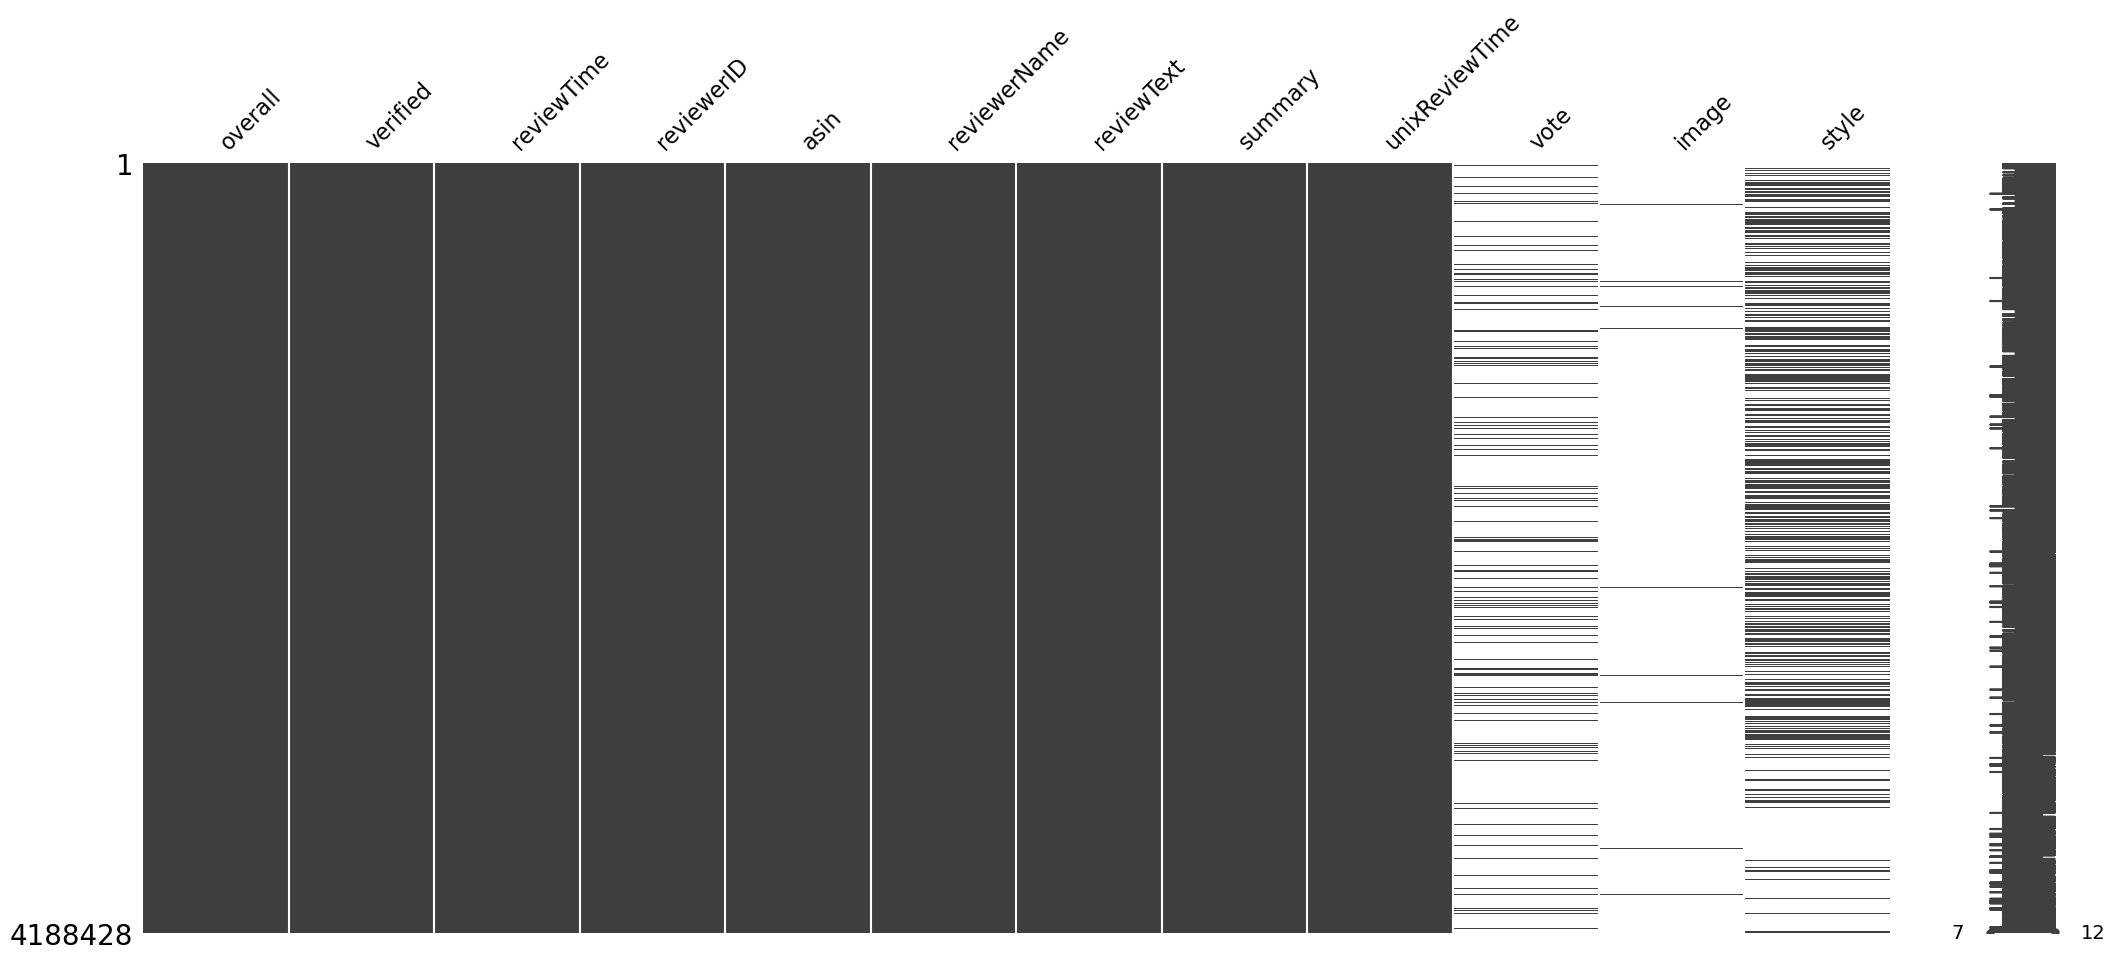

In [72]:
missingno.matrix(reviews_df)

In [73]:
# add the title
reviews_df['title'] = reviews_df['asin'].map(asin_title_map)
reviews_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,title
11,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
12,5.0,True,"11 10, 2014",A3F886P3E8L99T,4639725183,Bosshaug in Arizona,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,1415577600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,1414972800,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
14,5.0,True,"09 6, 2014",A29A6N9S9GDG6L,4639725183,Lake Cherokee,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,1409961600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,1400630400,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999712,5.0,True,"05 10, 2015",A3J79M83B391JO,B00U648FRU,Champlin-Ritter,Came in great condition. Love this tea the price was right and will order again,Very happy,1431216000,NaN,NaN,NaN,Tong Tji Kaffir Lime Tea
4999713,5.0,True,"02 13, 2017",A2JKN8Q4466GHN,B0091931KW,cheryl young,always a pleasure and always as promised,Five Stars,1486944000,NaN,NaN,NaN,Torani Sauce - SUGAR FREE - Chocolate
4999751,5.0,False,"03 23, 2015",A1TXC0JN8LY768,B00U32D65G,DW,I love the garlic flavor! The chipotle adds some spice and basil is refreshing!,Five Stars,1427068800,NaN,NaN,{'Flavor:': ' Basil'},AVOCARE Extra Virgin Avocado Oil (Basil)
4999753,5.0,True,"05 2, 2017",AD6C3F0DNSMSP,B00TA0FMZY,Amazon Customer,Excellent!!,Great product!!!,1493683200,NaN,NaN,NaN,Coppa Dry Cured Whole Pork Shoulder 2 Lbs


In [74]:
reviews_df.isna().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          547
reviewText           2116
summary              1020
unixReviewTime          0
vote              3643859
image             4141671
style             2319709
title                   8
dtype: int64

In [75]:
# Drop entries missing review text or title
reviews_df = reviews_df.dropna(subset=['reviewText','title'])
reviews_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,title
11,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
12,5.0,True,"11 10, 2014",A3F886P3E8L99T,4639725183,Bosshaug in Arizona,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,1415577600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,1414972800,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
14,5.0,True,"09 6, 2014",A29A6N9S9GDG6L,4639725183,Lake Cherokee,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,1409961600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,1400630400,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999712,5.0,True,"05 10, 2015",A3J79M83B391JO,B00U648FRU,Champlin-Ritter,Came in great condition. Love this tea the price was right and will order again,Very happy,1431216000,NaN,NaN,NaN,Tong Tji Kaffir Lime Tea
4999713,5.0,True,"02 13, 2017",A2JKN8Q4466GHN,B0091931KW,cheryl young,always a pleasure and always as promised,Five Stars,1486944000,NaN,NaN,NaN,Torani Sauce - SUGAR FREE - Chocolate
4999751,5.0,False,"03 23, 2015",A1TXC0JN8LY768,B00U32D65G,DW,I love the garlic flavor! The chipotle adds some spice and basil is refreshing!,Five Stars,1427068800,NaN,NaN,{'Flavor:': ' Basil'},AVOCARE Extra Virgin Avocado Oil (Basil)
4999753,5.0,True,"05 2, 2017",AD6C3F0DNSMSP,B00TA0FMZY,Amazon Customer,Excellent!!,Great product!!!,1493683200,NaN,NaN,NaN,Coppa Dry Cured Whole Pork Shoulder 2 Lbs


In [76]:
import datetime as dt

date_fmt = "%m %d, %Y"
today = dt.date.today()
today.strftime(date_fmt)

'02 07, 2024'

In [77]:
%%time
reviews_df['date']= pd.to_datetime(reviews_df['reviewTime'], infer_datetime_format=False, format=date_fmt)
reviews_df.head()

CPU times: user 4.74 s, sys: 16.2 ms, total: 4.75 s
Wall time: 4.76 s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,title,date
11,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-19
12,5.0,True,"11 10, 2014",A3F886P3E8L99T,4639725183,Bosshaug in Arizona,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,1415577600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-10
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,1414972800,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-03
14,5.0,True,"09 6, 2014",A29A6N9S9GDG6L,4639725183,Lake Cherokee,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,1409961600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-09-06
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,1400630400,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-05-21


In [78]:
reviews_df['year'] = reviews_df['date'].dt.year

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_45063/2611131130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['year'] = reviews_df['date'].dt.year


<Axes: >

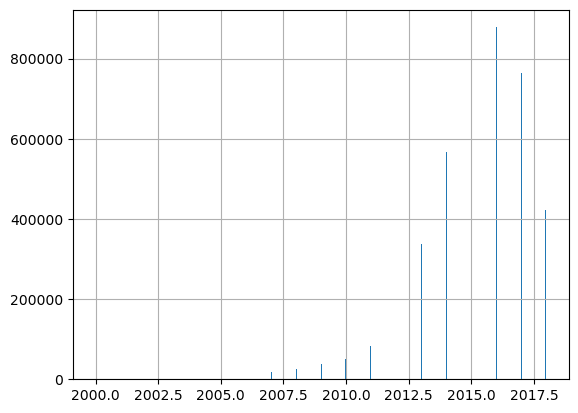

In [79]:
reviews_df['year'].hist(bins='auto')

#### Reducing Review Filesize

<Axes: >

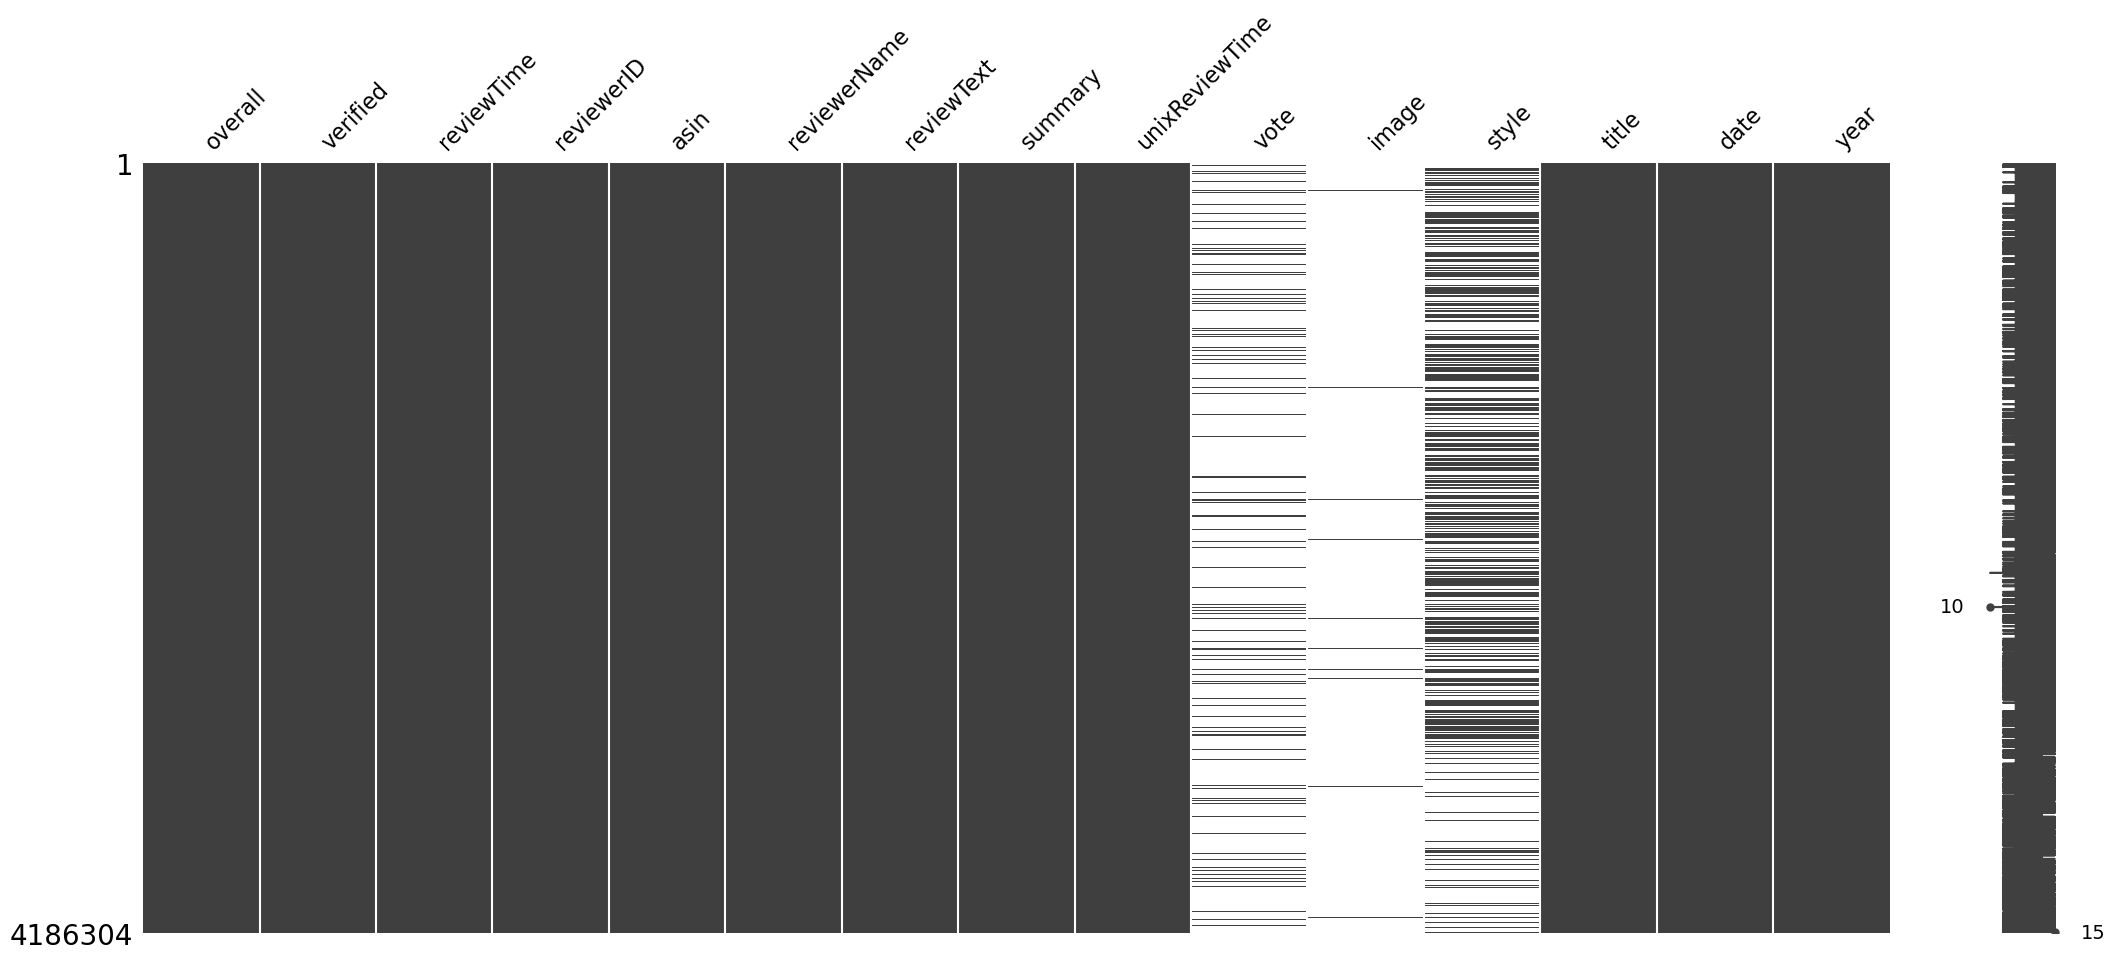

In [80]:
missingno.matrix(reviews_df)

In [81]:
reviews_df['vote'] = reviews_df['vote'].str.replace(",",'')

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_45063/436724679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['vote'] = reviews_df['vote'].str.replace(",",'')


In [82]:
reviews_df['verified'].value_counts()

True     3650974
False     535330
Name: verified, dtype: int64

Keep only verified purchases.

In [83]:
reviews_df = reviews_df[reviews_df['verified']==True]
reviews_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,title,date,year
11,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-19,2014
12,5.0,True,"11 10, 2014",A3F886P3E8L99T,4639725183,Bosshaug in Arizona,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,1415577600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-10,2014
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,1414972800,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-11-03,2014
14,5.0,True,"09 6, 2014",A29A6N9S9GDG6L,4639725183,Lake Cherokee,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,1409961600,NaN,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-09-06,2014
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,1400630400,2,NaN,NaN,Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),2014-05-21,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999707,5.0,True,"01 23, 2017",AMZ6B54X7JUDW,B00EGIDOUU,Amazon Customer,taste great!,Five Stars,1485129600,NaN,NaN,NaN,"Starbucks Pike Place Roast Medium Keurig K-cups,10 Count.",2017-01-23,2017
4999712,5.0,True,"05 10, 2015",A3J79M83B391JO,B00U648FRU,Champlin-Ritter,Came in great condition. Love this tea the price was right and will order again,Very happy,1431216000,NaN,NaN,NaN,Tong Tji Kaffir Lime Tea,2015-05-10,2015
4999713,5.0,True,"02 13, 2017",A2JKN8Q4466GHN,B0091931KW,cheryl young,always a pleasure and always as promised,Five Stars,1486944000,NaN,NaN,NaN,Torani Sauce - SUGAR FREE - Chocolate,2017-02-13,2017
4999753,5.0,True,"05 2, 2017",AD6C3F0DNSMSP,B00TA0FMZY,Amazon Customer,Excellent!!,Great product!!!,1493683200,NaN,NaN,NaN,Coppa Dry Cured Whole Pork Shoulder 2 Lbs,2017-05-02,2017


In [84]:
reviews_df['vote'].value_counts()#.head(20)

2      85692
3      42273
4      24089
5      15164
6      10275
       ...  
289        1
427        1
576        1
255        1
323        1
Name: vote, Length: 364, dtype: int64

In [85]:
# reviews_df['vote'] = pd.to_numeric(reviews_df['vote'],downcast='integer')
# reviews_df['vote'].value_counts().head(20)

In [86]:
reviews_df.memory_usage().sum()

441767854

In [87]:
# Selecting Final Set of columns and previewing memory usage
keep_cols = ['asin','reviewerID','reviewText','summary',#'date',#'vote',
             'overall','year']
reviews_df[keep_cols].memory_usage().sum()

204454544

In [88]:
# Filtering for final reviews data
reviews_df_final = reviews_df.loc[:, keep_cols]
reviews_df_final

,asin,reviewerID,reviewText,summary,overall,year
11,4639725183,A1QVBUH9E1V6I8,No adverse comment.,Five Stars,5.0,2014
12,4639725183,A3F886P3E8L99T,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,5.0,2014
13,4639725183,A2CHH5U12THP2D,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,5.0,2014
14,4639725183,A29A6N9S9GDG6L,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,5.0,2014
15,4639725183,A378HXZATS9HKM,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,5.0,2014
...,...,...,...,...,...,...
4999707,B00EGIDOUU,AMZ6B54X7JUDW,taste great!,Five Stars,5.0,2017
4999712,B00U648FRU,A3J79M83B391JO,Came in great condition. Love this tea the price was right and will order again,Very happy,5.0,2015
4999713,B0091931KW,A2JKN8Q4466GHN,always a pleasure and always as promised,Five Stars,5.0,2017
4999753,B00TA0FMZY,AD6C3F0DNSMSP,Excellent!!,Great product!!!,5.0,2017


In [89]:
reviews_df_final.isna().sum()

asin            0
reviewerID      0
reviewText      0
summary       819
overall         0
year            0
dtype: int64

In [90]:
reviews_df_final = reviews_df_final.dropna(subset=['summary','reviewText'])
reviews_df_final

,asin,reviewerID,reviewText,summary,overall,year
11,4639725183,A1QVBUH9E1V6I8,No adverse comment.,Five Stars,5.0,2014
12,4639725183,A3F886P3E8L99T,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,5.0,2014
13,4639725183,A2CHH5U12THP2D,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,5.0,2014
14,4639725183,A29A6N9S9GDG6L,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,5.0,2014
15,4639725183,A378HXZATS9HKM,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,5.0,2014
...,...,...,...,...,...,...
4999707,B00EGIDOUU,AMZ6B54X7JUDW,taste great!,Five Stars,5.0,2017
4999712,B00U648FRU,A3J79M83B391JO,Came in great condition. Love this tea the price was right and will order again,Very happy,5.0,2015
4999713,B0091931KW,A2JKN8Q4466GHN,always a pleasure and always as promised,Five Stars,5.0,2017
4999753,B00TA0FMZY,AD6C3F0DNSMSP,Excellent!!,Great product!!!,5.0,2017


In [91]:
filter_duplicates = reviews_df_final.duplicated(subset=['reviewerID','asin','reviewText'], keep=False)
filter_duplicates.sum()

225595

In [92]:
# filter_duplicates = reviews_df_final.duplicated(keep=False)#
reviews_df_final[filter_duplicates].sort_values(["reviewerID",'asin']).head(10)

,asin,reviewerID,reviewText,summary,overall,year
721664,B001792ULU,A0004478EF5NFPHLGCWG,"Brought back memories for a Baseball Themed Birthday party. arrived as discribed, variety great , enjoyed by every one Thank you",GREAT FUN,4.0,2013
867800,B001792ULU,A0004478EF5NFPHLGCWG,"Brought back memories for a Baseball Themed Birthday party. arrived as discribed, variety great , enjoyed by every one Thank you",GREAT FUN,4.0,2013
588709,B000VVWUMY,A01281618XKJ1O0C9536,Great product,Five Stars,5.0,2018
734845,B000VVWUMY,A01281618XKJ1O0C9536,Great product,Five Stars,5.0,2018
605922,B000WV0RW8,A01646946P6P0KQBF0M1,fine super fast,Five Stars,5.0,2015
752058,B000WV0RW8,A01646946P6P0KQBF0M1,fine super fast,Five Stars,5.0,2015
609397,B000X3TPHS,A020225198MPAXPT7KUT,"My baby girl like it very much! gonna buy it again ! Not so sweet,that I think it is very good","Kids like it,it is organic",5.0,2017
755533,B000X3TPHS,A020225198MPAXPT7KUT,"My baby girl like it very much! gonna buy it again ! Not so sweet,that I think it is very good","Kids like it,it is organic",5.0,2017
682356,B001467JYO,A024244519V8COZQOHH9,"I would totally recommend this product. And also found it to be great tasting and refreshing, with aromatic flavor at a wonderful price.",great drink,5.0,2014
828492,B001467JYO,A024244519V8COZQOHH9,"I would totally recommend this product. And also found it to be great tasting and refreshing, with aromatic flavor at a wonderful price.",great drink,5.0,2014


In [93]:
reviews_df_final = reviews_df_final.drop_duplicates(subset=['asin','reviewerID','reviewText'])
reviews_df_final

,asin,reviewerID,reviewText,summary,overall,year
11,4639725183,A1QVBUH9E1V6I8,No adverse comment.,Five Stars,5.0,2014
12,4639725183,A3F886P3E8L99T,These are hard to find locally and Amazon has it for a good price. I first tasted this tea in Costa Rica and loved it.,Wonderful tea and great price too!,5.0,2014
13,4639725183,A2CHH5U12THP2D,"Best black tea in US.\n\nHighly recommend.\nI use 3 bags in a large 16 oz glass mug with boiled water then add boiled milk & sugar. Oh my, it's wonderful. I wish I could drink it at night.",Best black tea in US,5.0,2014
14,4639725183,A29A6N9S9GDG6L,if you like strong flavorful tea you will enjoy this Yellow Label,Five Stars,5.0,2014
15,4639725183,A378HXZATS9HKM,"I first tasted this tea in the Far East and really loved the flavor of the tea - I was disappointed not to find it on grocery shelves but was so glad that it is offered by Amazon. It has a fresh, ...",Great Tea flavor,5.0,2014
...,...,...,...,...,...,...
4999707,B00EGIDOUU,AMZ6B54X7JUDW,taste great!,Five Stars,5.0,2017
4999712,B00U648FRU,A3J79M83B391JO,Came in great condition. Love this tea the price was right and will order again,Very happy,5.0,2015
4999713,B0091931KW,A2JKN8Q4466GHN,always a pleasure and always as promised,Five Stars,5.0,2017
4999753,B00TA0FMZY,AD6C3F0DNSMSP,Excellent!!,Great product!!!,5.0,2017


#### Downcast Data Types

In [94]:
reviews_df_final.memory_usage().sum()

198069760

In [95]:
reviews_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536960 entries, 11 to 4999774
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   asin        object 
 1   reviewerID  object 
 2   reviewText  object 
 3   summary     object 
 4   overall     float64
 5   year        int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 188.9+ MB


In [96]:
reviews_df_final['overall'] = reviews_df_final['overall'].astype("float16") 
# reviews_df_final['year'] = reviews_df_final['overall'].astype("int16") 
reviews_df_final.dtypes

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_45063/294472945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_final['overall'] = reviews_df_final['overall'].astype("float16")


asin           object
reviewerID     object
reviewText     object
summary        object
overall       float16
year            int64
dtype: object

In [97]:
reviews_df_final.memory_usage()#.sum()

Index         28295680
asin          28295680
reviewerID    28295680
reviewText    28295680
summary       28295680
overall        7073920
year          28295680
dtype: int64

In [98]:
# reviews_df_final['date'].astype('datetime32[]').memory_usage()

In [99]:
# reviews_df_final = reviews_df_final.reset_index(drop=True)

## Splitting Final Reviews into Multiple Files (years)

In [100]:
# Create new folder for reviews by eyars
folder_reviews = "reviews-by-year/"
os.makedirs(folder_reviews, exist_ok=True)

In [101]:
reviews_df_final['year'].value_counts()

2016    759214
2015    745894
2017    670279
2014    459532
2018    390547
2013    280346
2012    100113
2011     57104
2010     34524
2009     20413
2008      9908
2007      7367
2006      1563
2005       115
2004        34
2003         4
2002         3
Name: year, dtype: int64

In [102]:
reviews_df_final.dtypes

asin           object
reviewerID     object
reviewText     object
summary        object
overall       float16
year            int64
dtype: object

In [103]:
# loop through filepart column to save

for year in reviews_df_final['year'].unique():
    temp_df = reviews_df_final[reviews_df_final['year'] == year]
    fpath_reviews_part = f'{folder_reviews}amazon-reviews-groceries-gourmet-{year}.csv.gz'
    print(f"- Creating file: {fpath_reviews_part}")

    temp_df.to_csv(fpath_reviews_part, compression={'method': 'gzip', 'compresslevel': 9},#compression='gzip', 
                        index=False)


- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2014.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2013.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2012.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2016.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2015.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2011.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2008.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2017.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2010.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2009.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2007.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourmet-2006.csv.gz
- Creating file: reviews-by-year/amazon-reviews-groceries-gourme

In [105]:
# # move final metadata to new reivews-by-year folder
# import shutil
# shutil.

> Now move on to notebook 2 for selecting the finals subset of reviews for analysis.

# APPENDIX

In [ ]:
raise Exception("end of current code")

In [ ]:
reviews_df_final

In [ ]:
# reviews_df_final.duplicated(subset=['reviewerID','asin','reviewText']).sum()
# reviews_df_final = 

In [ ]:
# reviews_df_final_a = reviews_df_final[filter_year]
# reviews_df_final_a

In [ ]:
# reviews_df_final_b = reviews_df_final[~filter_year]
# reviews_df_final_b

In [ ]:
# fpath_reviews_a = 'combined-reviews-amazon-groceries-gourmet-pre-2016.csv.gz'
# reviews_df_final_a.to_csv(fpath_reviews_a, compression={'method': 'gzip', 'compresslevel': 9},#compression='gzip', 
#                         index=False)

In [ ]:
# # reviews_df_final.to_excel('combined-reviews-amazon-groceries-gourmet.xlsx', index=False, )
# fpath_reviews_feather = 'combined-reviews-amazon-groceries-gourmet.feather'
# reviews_df_final.reset_index(drop=True).to_feather(fpath_reviews_feather, compression_level=9, chunksize=10_000)

In [ ]:
# fpath_reviews_b = 'combined-reviews-amazon-groceries-gourmet-2016-end.csv.gz'
# reviews_df_final_b.to_csv(fpath_reviews_b, compression={'method': 'gzip', 'compresslevel': 9},#compression='gzip', 
#                         index=False)

> Final reviews  file is still too large

In [ ]:
# # Curious how many reviews per reviewer
# reviewer_counts = reviews_df_final['reviewerID'].value_counts()
# reviewer_counts.hist(bins='auto')

In [ ]:
# reviewer_counts.describe().round(2)

In [ ]:
# # What % of the reviewers in the daataset has more than 10 reviews?
# filter_many_reviews = reviewer_counts>10
# filter_many_reviews.sum()/len(reviewer_counts) * 100

In [ ]:
# many_reviews_id = reviewer_counts[filter_many_reviews].index
# len(many_reviews_id)

In [ ]:
# reviews_df_final[reviews_df_final['reviewerID'].isin(many_reviews_id)]